# Automated Feature Engineering

This notebook demonstrates the use of AutoFeat for automated feature engineering and selection on a regression dataset. It includes interpretability discussions, feature selection, model training, and evaluation before and after feature engineering.

## Overview
The key steps involve interpreting model explainability, feature selection, model training, and evaluating the impact of generated features.

## Procedure
- **Interpretability and Model Explainability**: Discuss the necessity of model interpretability.
- **Feature Selection**: Use `FeatureSelector` on the Diabetes dataset to determine the number of discarded features.
- **Feature Engineering with AutoFeat**: Apply `AutoFeatRegressor` to generate new features and assess the relative change in R2 score.

# Logistic Regression with Regularization

This notebook explores regularization in logistic regression using the IRIS dataset. It involves fitting models with L1 and L2 penalties and analyzing the impact of regularization on the coefficients.

## Overview
The key steps involve understanding logistic regression parameters, fitting models with L1 and L2 penalties, and analyzing the effect of regularization.

## Procedure
- **Parameter Explanation**: Describe the significance of parameters C, solver, penalty, and multi_class in logistic regression.
- **Regularization Penalties**: Explain the meaning of L1 and L2 penalties.
- **Model Fitting**: Fit logistic regression models with L1 and L2 penalties for different values of C, and plot the coefficients.
- **Coefficient Analysis**: Calculate and plot the ratio of L2 norms for different values of C, and analyze the impact of regularization.

In [17]:
from sklearn.linear_model import LogisticRegression


LogisticRegression()

LogisticRegression()

from sklearn.linear_model import LogisticRegression

dir(LogisticRegression)
```python
Init signature:
LogisticRegression(
    penalty='l2',
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
```

- penalty: the regularization term penalizes large coefficients to prevent overfitting. Manhattan, Lasso, Euclidean, Ridge, etc. are common penalties.
- dual: the dual basically solves the dual optimization problem, similar I believe to SVMs. It is implemented only on L2 penalty with liblinear solver.
- tol: tolerance delta for halting the parameter optimization.
- C: the inverse of regularization strength. Smaller values specify stronger regularization.
- fit_intercept: whether to fit the intercept term.
- intercept_scaling: scaling of the intercept term.
- class_weight: weights for each class.


## Part 2
Define the meaning of 'l1' and 'l2' penalty in the context of regularization.


l1: the L1 penalty basically adds the absolute value of the coefficients to the loss function. This basically acts as an inhibitor for the coefficients to grow too large, and potenitally overfit the data. 

l2: the L2 penalty adds the square of the coefficients to the loss function. This is basically the same as the L1 penalty, but the coefficients are squared, which makes the penalty more severe for larger coefficients. 


## Part 3
Using 'l1' and 'l2' penalty, fit 10 logistic regression models for each penalty type across different values of C (10^-4, 10^-3, ..., 10^5), with multi_class='ovr'. Plot weight coefficients for petal width and length of class 0 and 2 for different values of C.

In [18]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

# Load iris dataset
iris = load_iris()
X = iris.data[:, 2:4]
y = iris.target

# standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# split the data


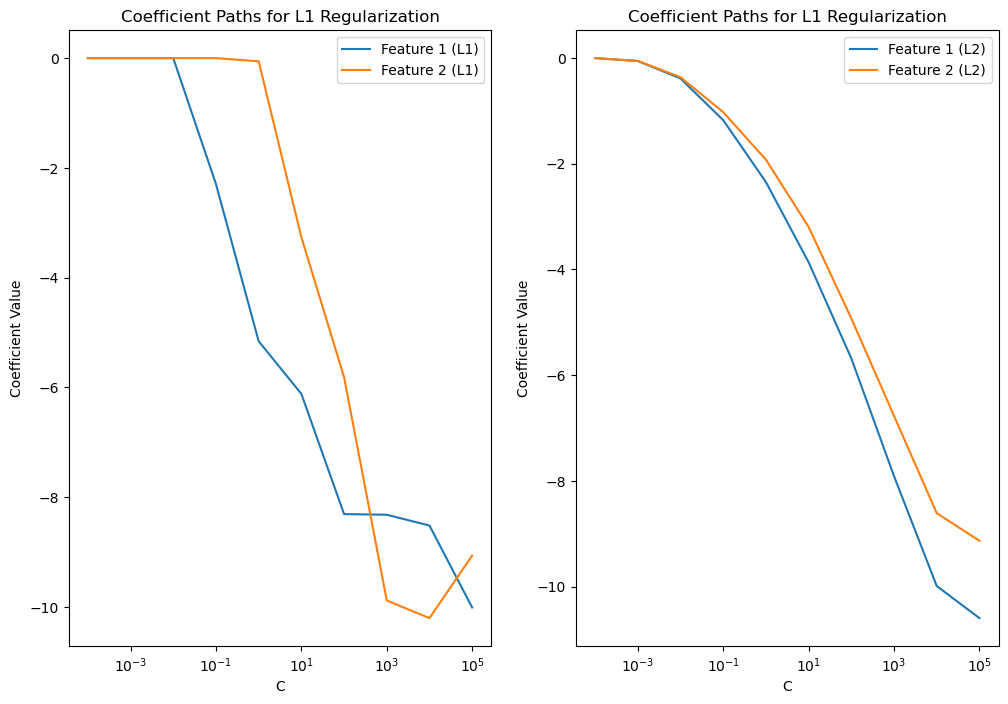

In [19]:
C_values = [10**i for i in range(-4, 6)]
penalties = ['l1', 'l2']

coefficients = {}
coefficients_raw = {}

for penalty in penalties:
    coefficients[penalty] = []
    coefficients_raw[penalty] = []
    for C in C_values:
        clf = LogisticRegression(C=C, penalty=penalty, solver='liblinear', multi_class='ovr')
        clf.fit(X, y)
        coefficients[penalty].append(clf.coef_.flatten())
        coefficients_raw[penalty].append(clf.coef_)

coefficients['l1'] = np.array(coefficients['l1'])
coefficients['l2'] = np.array(coefficients['l2'])


plt.figure(figsize=(12, 8))

plt.subplot(121)
for i in range(2):
    plt.plot(C_values, coefficients['l1'][:, i], label=f'Feature {i+1} (L1)')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Coefficient Value')
plt.title('Coefficient Paths for L1 Regularization')
plt.legend()

plt.subplot(122)
for i in range(2):
    plt.plot(C_values, coefficients['l2'][:, i], label=f'Feature {i+1} (L2)')

plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Coefficient Value')
plt.title('Coefficient Paths for L1 Regularization')
plt.legend()
plt.show()


We can see that the coefficients for the petal width and length of class 0 and 2 are very similar for both L1 and L2 penalties, however, the L1 penalty has a more severe penalty for larger coefficients, which is why the coefficients are smaller for the L1 penalty.

## Part 4

Calculate the ratio of L2 norms of the weight coefficients for different values of C and penalty ('l1' and 'l2'), plotting this ratio against the values of the four coefficients.

Plot this ratio on the x-axis and the value of the four coefficients on the y-axis for different values of C. You will get similar graphs as we discussed in class for regularization with linear regression. This will show you how the ratio between the total magnitude of coefficients with varying degrees of regularization and with C=100000. 

**Question:** What is your observation from these graphs for ’l1’ and ’l2’ penalty?

0.0000, 0.0006
0.0000, 0.0058
0.0000, 0.0369
0.1233, 0.1077
0.3476, 0.2324
0.6704, 0.4401
0.8653, 0.6910
0.9705, 0.8586
0.9864, 0.9684
1.0000, 1.0000


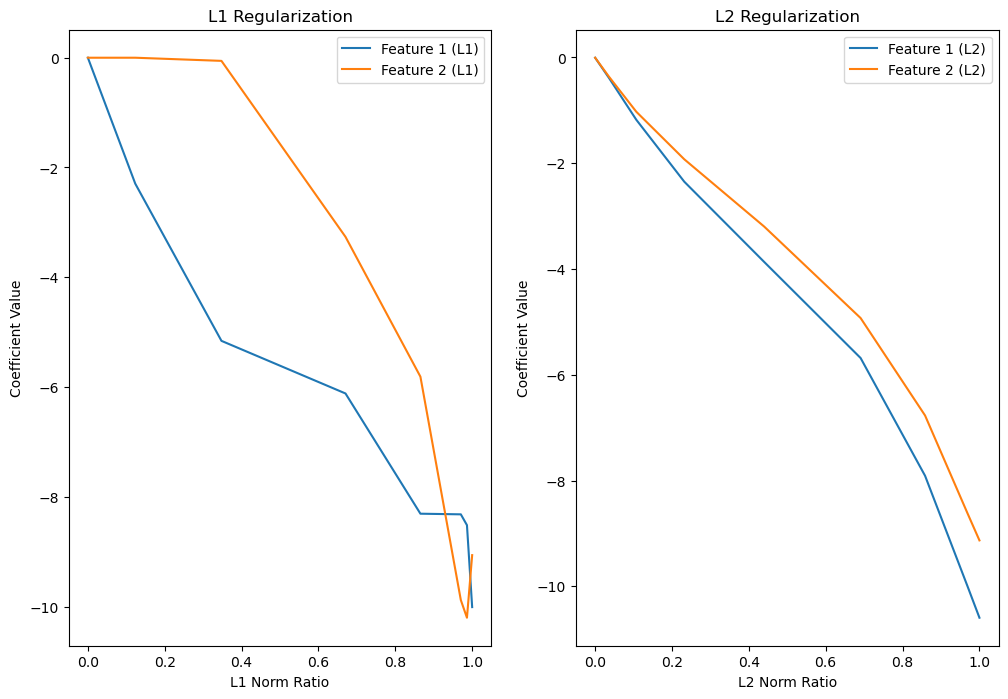

In [20]:

l1_norm_base = np.linalg.norm(coefficients_raw['l1'][-1], ord=2)
l2_norm_base = np.linalg.norm(coefficients_raw['l2'][-1], ord=2)
l1_norm_base

l1_res, l2_res = [], []

for i in range(len(coefficients_raw['l1'])):
    l1_norm = np.linalg.norm(coefficients_raw['l1'][i], ord=2)
    l2_norm = np.linalg.norm(coefficients_raw['l2'][i], ord=2)
    l1_ratio = l1_norm / l1_norm_base
    l2_ratio = l2_norm / l2_norm_base
    l1_res.append(l1_ratio)
    l2_res.append(l2_ratio)
    print(f"{l1_norm / l1_norm_base:.4f}, {l2_norm / l2_norm_base:.4f}")


plt.figure(figsize=(12, 8))
plt.subplot(121)
for i in range(2):
    plt.plot(l1_res, coefficients['l1'][:, i], label=f'Feature {i+1} (L1)')
plt.xlabel('L1 Norm Ratio')
plt.ylabel('Coefficient Value')
plt.title('L1 Regularization')
plt.legend()

plt.subplot(122)
for i in range(2):
    plt.plot(l2_res, coefficients['l2'][:, i], label=f'Feature {i+1} (L2)')
plt.xlabel('L2 Norm Ratio')
plt.ylabel('Coefficient Value')
plt.title('L2 Regularization')
plt.legend()
plt.show()

We can see that as the value of C increases, the ratio of the L2 norm of the weight coefficients decreases. This is because as the value of C increases, the regularization strength decreases, which allows the coefficients to grow larger. This is reflected in the L2 norm of the weight coefficients, which decreases as the value of C increases.